# Plotting Sigmoid Function

$S_{w,b}(x) = \frac{1}{1+e^{-(wx+b)}}$

In [1]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
def sigmoid(x,w,b):
  return (1/(1+np.exp(-(w*x+b))))

In [3]:
sigmoid(1,0.5,0)

0.6224593312018546

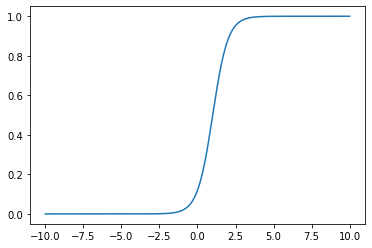

In [5]:
w = 2
b = -2 
x = np.linspace(-10,10,1000)
Y = sigmoid(x,w,b)

plt.plot(x,Y)

## $S_{w_1,w_2,b}(x_1,x_2) = \frac{1}{1 + e^{-(w_1*x_1 + w_2 * x_2 + b)}}$

In [6]:
def sigmoid_2d(x1,x2,w1,w2,b):
  return 1/(1+np.exp(-(w1*x1+w2*x2+b)))

In [7]:
sigmoid_2d(2,3,1,1,2)

0.9990889488055994

In [8]:
from mpl_toolkits import mplot3d

In [9]:
x1 = np.linspace(-10,10,100)
x2 = np.linspace(-10,10,100)

XX1, XX2 = np.meshgrid(x1,x2)

print(x1.shape, x2.shape, XX1.shape, XX2.shape)

(100,) (100,) (100, 100) (100, 100)


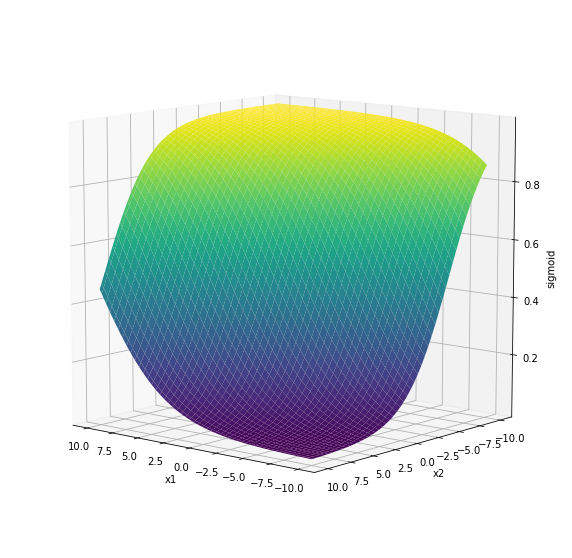

In [10]:
w1 = 0.3
w2 = -0.4 
b = 0.8
Y = sigmoid_2d(XX1, XX2, w1, w2,b)

fig = plt.subplots(figsize=(10,10) )
ax = plt.axes(projection = '3d')
ax.plot_surface(XX1,XX2,Y,cmap='viridis')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('sigmoid')
ax.view_init(10,130)

Text(0, 0.5, 'x2')

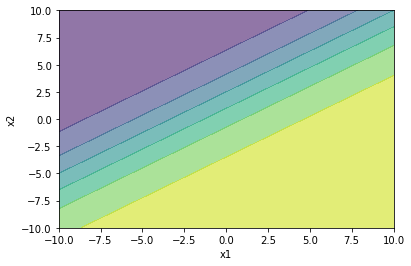

In [11]:
plt.contourf(XX1,XX2,Y,cmap = 'viridis',alpha = 0.6)
plt.xlabel('x1')
plt.ylabel('x2')

# Compute Loss for a given Set

In [12]:
w_unknown = 0.5
b_unknown = 0.25

X = np.random.random(25)*20 - 10
Y = sigmoid(X,w_unknown, b_unknown)

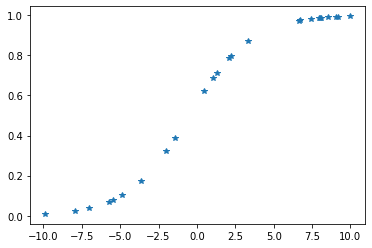

In [13]:
plt.plot(X,Y,'*')

In [14]:
def calculate_loss(X,Y,w_est,b_est):
  loss = 0
  for x,y in zip(X,Y):
    loss+=(y-sigmoid(x,w_est,b_est))**2
  return loss

In [15]:
W = np.linspace(0,1,101)
B = np.linspace(-1,1,101)

WW,BB = np.meshgrid(W,B)

In [16]:
WW.shape
Loss = np.zeros(WW.shape)

In [17]:
for i in range(WW.shape[0]):
  for j in range(WW.shape[1]):
    Loss[i,j] = calculate_loss(X,Y,WW[i,j],BB[i,j])

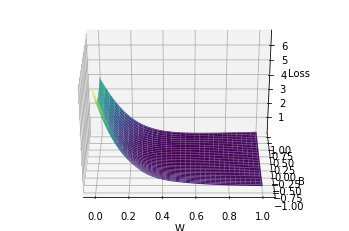

In [18]:
fig = plt.figure()
ax = plt.axes(projection = '3d')
ax.plot_surface(WW,BB,Loss,cmap='viridis')
ax.set_xlabel('W')
ax.set_ylabel('B')
ax.set_zlabel('Loss')
ax.view_init(30,270)

In [19]:
ij = np.argmin(Loss)
i = int(np.floor(ij/Loss.shape[1]))
j = int(ij - i* Loss.shape[1])
print(i,j)

63 50


In [20]:
print(WW[i,j],BB[i,j])

0.5 0.26


# Class for Sigmoid Neuron 

In [21]:
from sklearn.metrics import mean_squared_error
from tqdm import tqdm_notebook

In [22]:
class sigmoid_neuron:
  
  def __init__(self):
    self.w = None
    self.b = None
    
  def perceptron(self,x):
    return np.dot(x,self.w.T) + self.b
  
  def sigmoid(self,x):
    return 1.0/(1.0+np.exp(-x))
  
  def grad_w(self,x, y):
    y_pred = self.sigmoid(self.perceptron(x))
    return (y_pred - y) * x
  
  def grad_b(self,x, y):
    y_pred = self.sigmoid(self.perceptron(x))
    return (y_pred - y)
  
  def fit(self,X,Y, epochs = 1, learning_rate = 1 , initialize = False, display_loss = False):
    if initialize:
      self.w = np.random.randn(1,X.shape[1])
      self.b = 0
    if display_loss:
      loss = {}
    
    for i in tqdm_notebook(range(epochs), total = epochs, unit = "epoch"):
      dw = 0
      db = 0
      
      for x,y in zip(X,Y):
        dw += self.grad_w(x,y)
        db += self.grad_b(x,y)
      self.w -= learning_rate * dw
      self.b -= learning_rate * db
      
      if display_loss:
        Y_pred = self.sigmoid(self.perceptron(X))
        loss[i] = mean_squared_error(Y_pred, Y)
    if display_loss:
      plt.plot(loss.values())
      plt.xlabel('No of epochs')
      plt.ylabel('Mean Squared Error')
      
  def predict(self,X):
    Y_pred = []
    for x in X:
      y_pred = self.sigmoid(self.perceptron(x))
      Y_pred.append(y_pred)
    return np.array(Y_pred)
    

# Fit for toy data

In [31]:
from sklearn.datasets import make_blobs

In [48]:
X,labels = make_blobs(n_samples=100,n_features=2,centers=2,random_state=0)

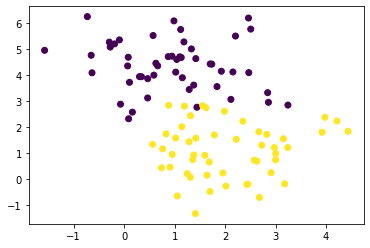

In [49]:
plt.scatter(X[:,0],X[:,1],c = labels)

In [51]:
def plot_sn(X,Y,sn,ax):
  X1 = np.linspace(-10,10,101)
  X2 = np.linspace(-10,10,101)
  XX1, XX2 = np.meshgrid(X1,X2)
  YY = np.zeros(XX1.shape)
  for i in range(X2.size):
    for j in range(X1.size):
      val = np.asarray([X1[j],X2[i]])
      YY[i,j] = sn.sigmoid(sn.perceptron(val))
      
  ax.contourf(XX1,XX2,YY, cmap='viridis', alpha = 0.6)
  ax.scatter(X[:,0],X[:,1], c = Y)
  ax.plot()

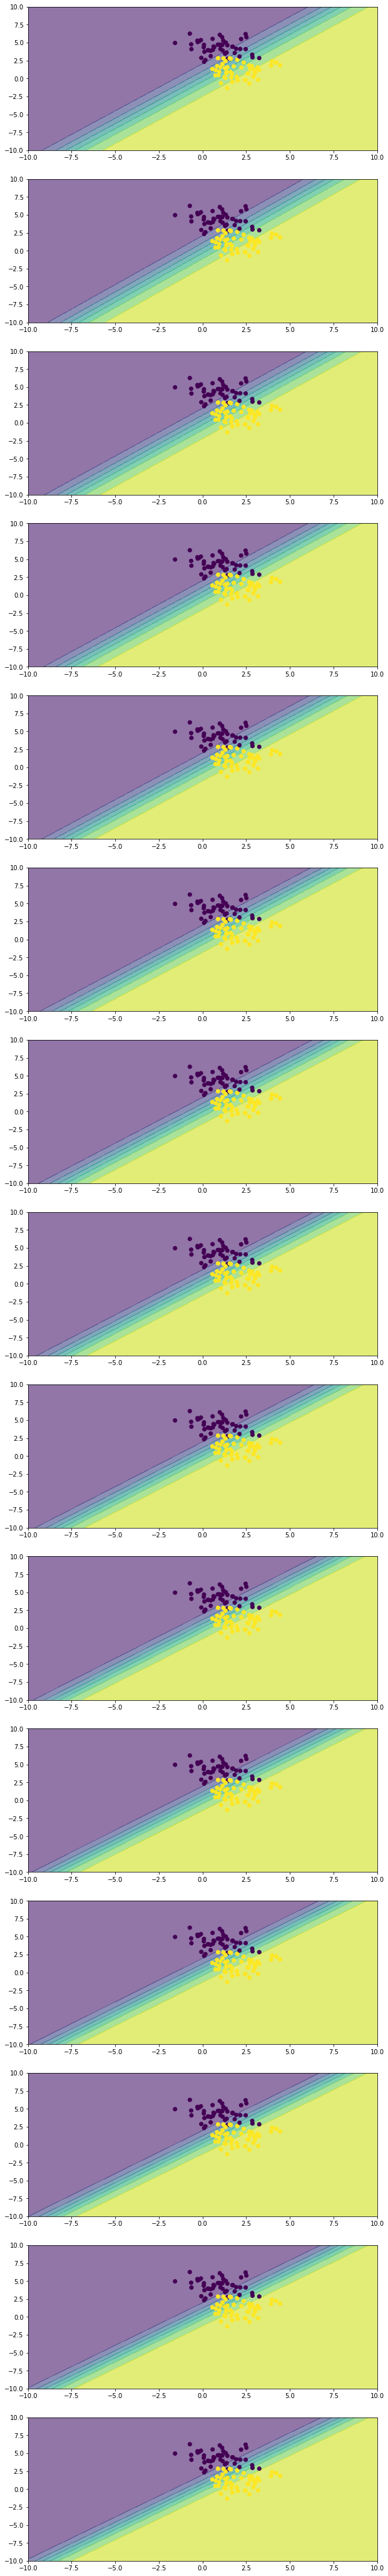

In [61]:
sn = sigmoid_neuron()
sn.fit(X,labels,1,0.01,True)
M = 15
plt.figure
plt.figure(figsize = (10,M*5))
for i in range(M):
#   print(sn.w,sn.b)
  ax = plt.subplot(M,1,i+1)
  plot_sn(X,labels,sn,ax)
  sn.fit(X,labels,1,0.01,False)